In [34]:
import numpy as np
import glob
import random
import matplotlib.pyplot as plt

In [22]:
originalchippath = "/explore/nobackup/people/szhang16/abiChipsNew"
newchippath = "/explore/nobackup/projects/pix4dcloud/szhang16/abiChips/GOES-16"
SAMPLE_SIZE = 1000

In [26]:
originalchipsample = random.sample(glob.glob(originalchippath + "/*.npz"), SAMPLE_SIZE)
newchipsample = random.sample(glob.glob(newchippath + "/*.npz"), SAMPLE_SIZE)

In [27]:
translation = [1, 2, 0, 4, 5, 6, 3, 8, 9, 10, 11, 13, 14, 15]

In [33]:
odata = {}
ndata = {}
for i in range(14):
    odata[i] = np.array([])
    ndata[i] = np.array([])

for i in range(SAMPLE_SIZE):
    ochip = np.load(originalchipsample[i])
    nchip = np.load(newchipsample[i])
    ochip = ochip['chip']
    nchip = nchip['chip'][..., translation]

    for j in range(14):
        odata[j] = np.append(odata[j], ochip[:, :, j].flatten())
        ndata[j] = np.append(ndata[j], nchip[:, :, j].flatten())

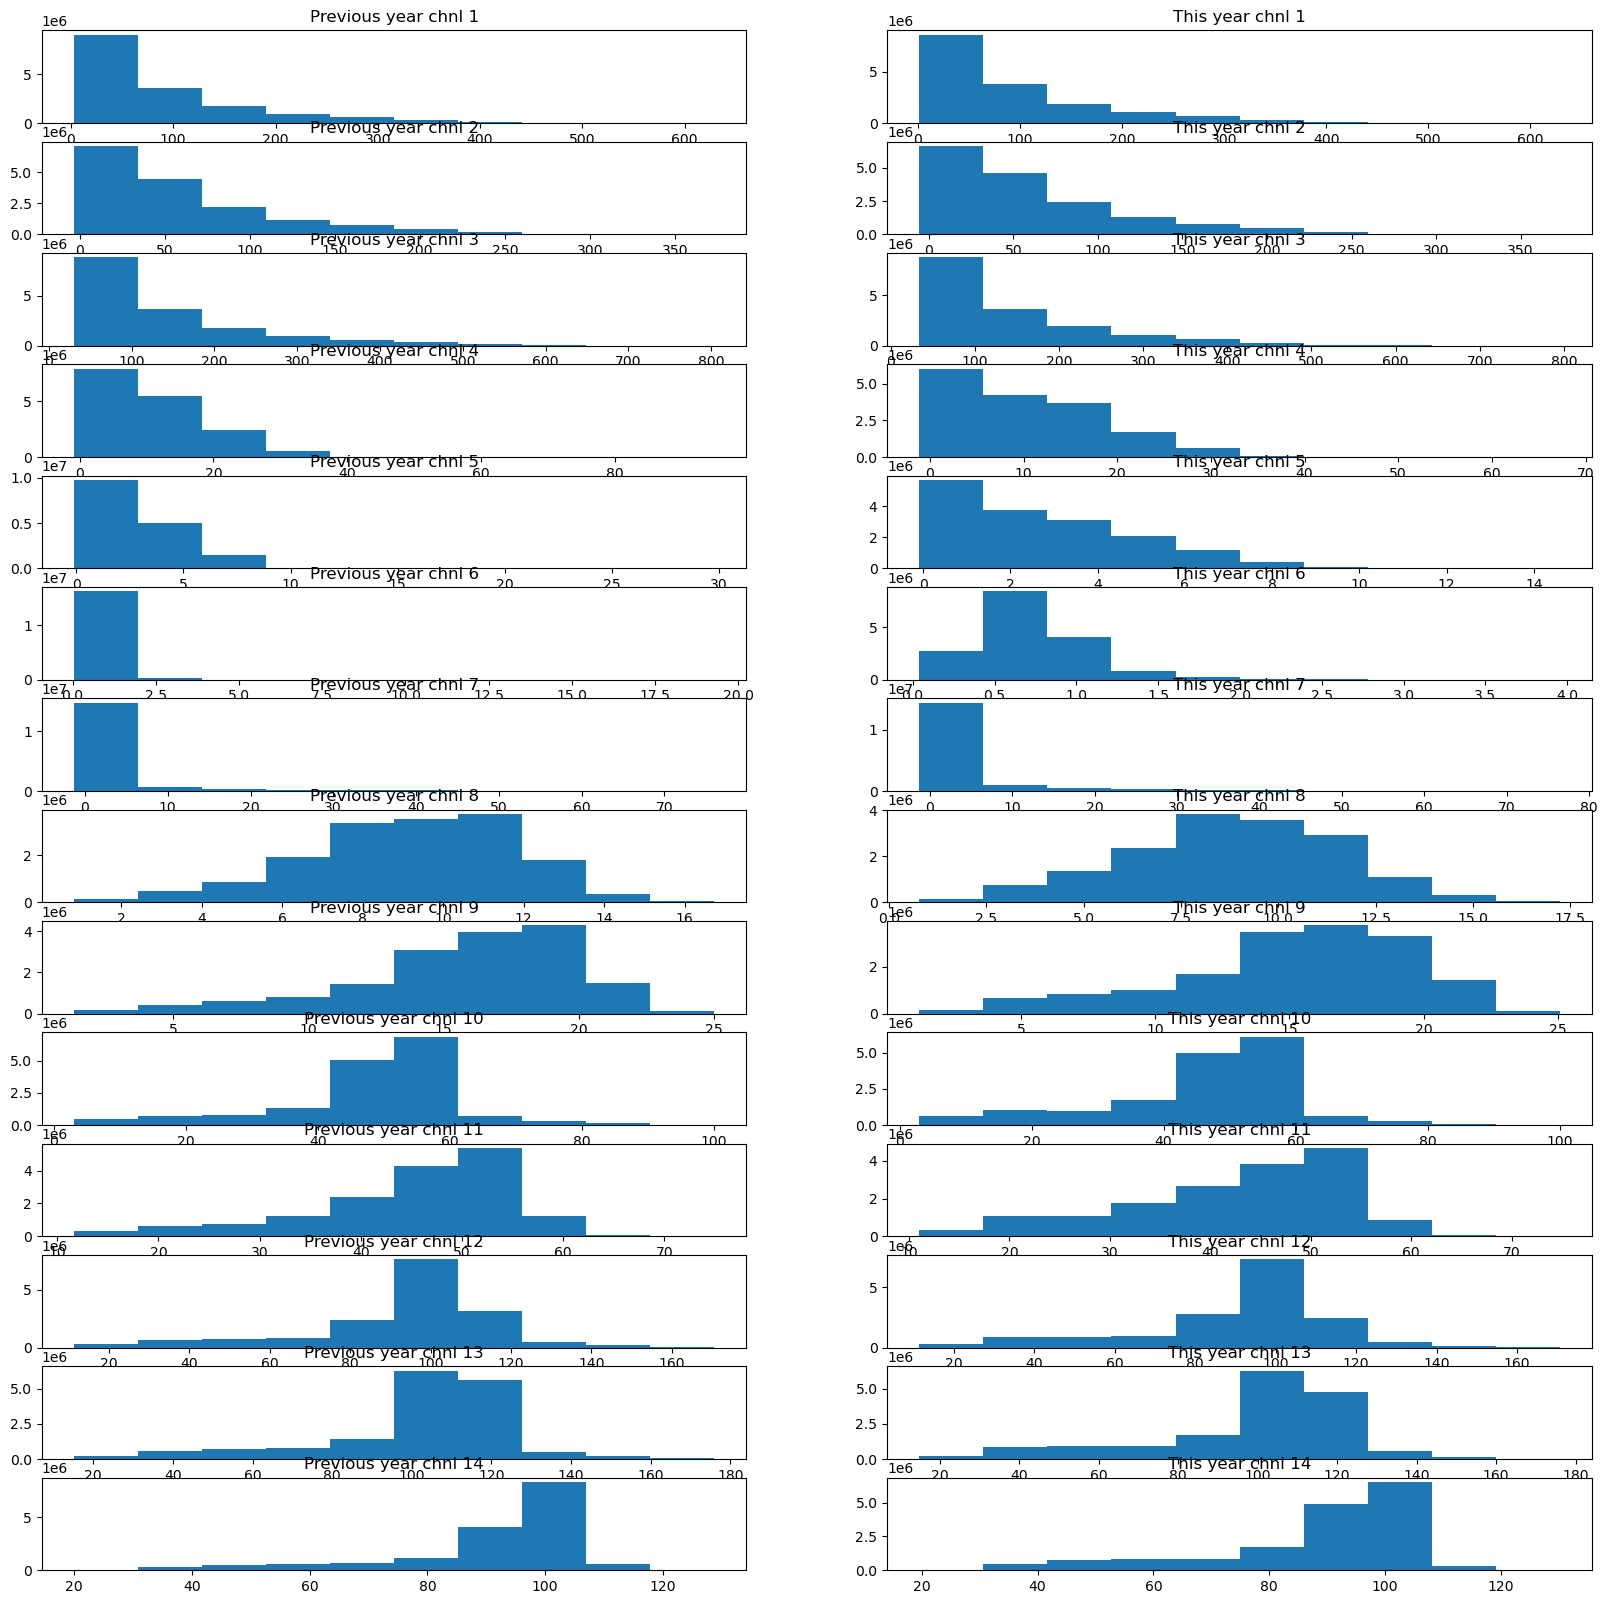

In [35]:
fig, axs = plt.subplots(14, 2, figsize=(20, 20))
for i in range(14):
    axs[i, 0].hist(odata[i])
    axs[i, 1].hist(ndata[i])
    axs[i, 0].set_title(f"Previous year chnl {i+1}")
    axs[i, 1].set_title(f"This year chnl {i+1}")

plt.show()